# 一维最大熵法图像二值化

In [3]:
#coding:utf-8
import numpy
import numpy as np
from numpy.lib.function_base import histogram

# import numpy.histogram
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [4]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [45]:
def entropy_threshold_segment(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    counts,bins = histogram(src.flatten(),256,normed=True)
    max_val = np.max(src)
    min_val = np.min(src)
    pt = 0.0
    Ht = 0.0
    H1 = 0.0
    eps = 1.0e-5
    Th = 0

    for idx,val in enumerate(counts[min_val:max_val]):
        t = float(val / (rows * cols))
        if  t > 0.00000001 :
            H1 += -t * np.log10(t + eps)
    temp_max = 0
    for idx,val in enumerate(counts[min_val:max_val]):
        t = float(val / (rows * cols))
        pt += t
        if t > 0.00000001:
            Ht += -t * np.log10(t + eps)
            sigma = np.log10(pt * (1 - pt) + eps) * Ht / (pt+eps) + (H1 - Ht) / (1 - pt + eps)
            sigma = np.abs(sigma)
            if sigma > temp_max:
                temp_max = sigma
                Th = idx
            
    dst[src < Th] = 0
    dst[src >= Th] = 255
    return dst,Th
    

In [46]:
dst,Th = entropy_threshold_segment(gray)
print('Threshold:',Th)

Threshold: 185


Text(0.5,1,'Entropty Threshold')

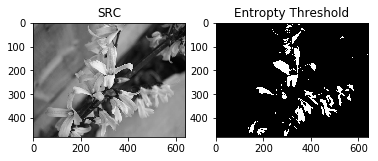

In [47]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Entropty Threshold')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45169061